In [1]:
from sobol import *
from van_der_corput import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform
import pandas as pd
from halton import *
from ctypes import *
from hammersley import *
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
halton_seq_2d = halton_sequence(0,499,2).T
np.savetxt(r'halton_2d.txt', halton_seq_2d)

In [106]:
halton_seq_3d = halton_sequence(0,199,3).T
np.savetxt(r'halton_3d.txt', halton_seq_3d)

In [94]:
ham_seq_2d = hammersley_sequence(0, 499, 2, 2).T
np.savetxt(r'hammersley_2d_500.txt', ham_seq_2d)

In [ ]:
ham_seq_2d = hammersley_sequence(0, 499, 2, 2).T
np.savetxt(r'hammersley_2d.txt', ham_seq_2d)

In [78]:
ham_seq_3d = hammersley_sequence(0, 99, 3, 2).T
np.savetxt(r'hammersley_3d.txt', ham_seq_3d)

In [97]:
ham_seq_3d = hammersley_sequence(0, 49, 3, 2).T
np.savetxt(r'hammersley_3d_50.txt', ham_seq_3d)

In [12]:
rs2 = []
ss2 = []
seed2 = tau_sobol(2)
for _ in range(500):
    [r2, seed2] = i4_sobol(2, seed2)
    rs2.append(list(r2))
    ss2.append(seed2)
data2 = pd.DataFrame(rs2)
np.savetxt(r'sobol_2d.txt', data2)

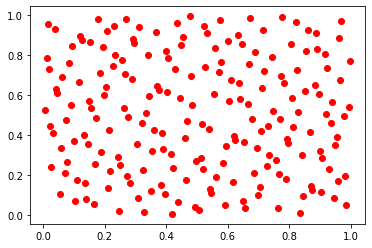

In [107]:
rs = []
ss = []
seed = tau_sobol(3)
for _ in range(200):
    [r, seed] = i4_sobol(3, seed)
    rs.append(list(r))
    ss.append(seed)
data = pd.DataFrame(rs)
plt.plot(data[0], data[2], 'ro')

In [108]:
np.savetxt(r'sobol_3d.txt', data)

In [14]:
xs2 = []
ys2 = []

for _ in range(500):
    xs2.append(uniform.rvs(0))
    ys2.append(uniform.rvs(0))

uniform_2d = pd.DataFrame((xs2,ys2)).iloc[:,:].T
np.savetxt(r'uniform_2d.txt', uniform_2d.values)

In [109]:
xs = []
ys = []
zs = []

for _ in range(200):
    xs.append(uniform.rvs(0))
    ys.append(uniform.rvs(0))
    zs.append(uniform.rvs(0))

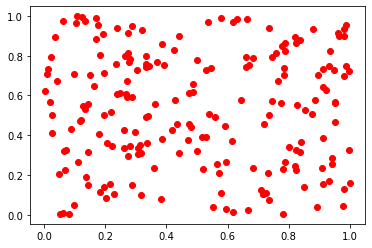

In [110]:
uniform_3d = pd.DataFrame((xs,ys,zs)).T
np.savetxt(r'uniform_3d.txt', uniform_3d.values)
plt.plot(xs, ys, 'ro')

In [21]:
data_uniform = pd.DataFrame((xs,ys)).T
np.savetxt(r'uniform_numbers.txt', data_uniform.values)

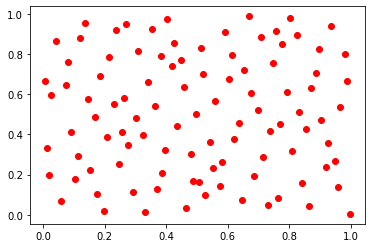

In [23]:
plt.plot(uniform.ppf(data[0]), uniform.ppf(data[1]), 'ro')

In [24]:
data_ppf = pd.DataFrame((uniform.ppf(data[0]), uniform.ppf(data[1]))).T
np.savetxt(r'ppf_numbers.txt', data_ppf.values)

In [25]:
cov(uniform.ppf(data[0]), uniform.ppf(data[1]))

array([[0.08258947, 0.0002315 ],
       [0.0002315 , 0.08430653]])

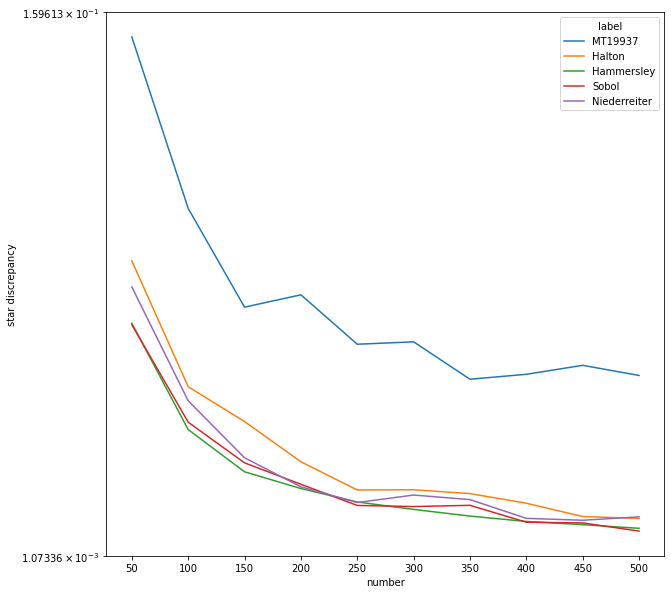

In [33]:
norm_l = [0.152201,0.102201,0.0734617,0.076901,0.0625,0.0633167,0.0522844,0.0539463,0.0562613,0.0534959]
norm_u = [0.152613,0.102613,0.0737219,0.0774836,0.0630476,0.0636339,0.0528569,0.0540716,0.0569904,0.0538465]
norm_m = np.average(np.array([norm_l,norm_u]),axis=0)

halton_l = [0.0866667,0.0502392,0.0397827,0.02826,0.0199059,0.0199414,0.0190287,0.0161716,0.0122184,0.0115593]
halton_u = [0.0875075,0.050531,0.0406689,0.028751,0.0206342,0.0207306,0.0194098,0.0166377,0.0128433,0.0123616]
halton_m = np.average(np.array([halton_l,halton_u]),axis=0)

hammersley_l = [0.06875,0.0378125,0.0252083,0.0205469,0.0164375,0.0142448,0.0122098,0.0107617,0.00970486,0.00889062]
hammersley_u = [0.0690406,0.0379603,0.0259349,0.0208379,0.0171046,0.0149597,0.0130978,0.0114187,0.0106009,0.00929946]
hammersley_m = np.average(np.array([hammersley_l,hammersley_u]),axis=0)

sobol_l=[0.0680859,0.0398437,0.0274105,0.0215149,0.0153127,0.0150315,0.0155077,0.0106149,0.0103954,0.00786038]
sobol_u=[0.0688848,0.040244,0.028961,0.0223575,0.0162023,0.0158442,0.0160774,0.0111295,0.0109213,0.00869907]
sobol_m=np.average(np.array([sobol_l,sobol_u]),axis=0)

niederreiter_l=[0.0793066,0.0460742,0.0292813,0.0209969,0.0161554,0.0184124,0.0172153,0.0115395,0.0111083,0.0121728]
niederreiter_u=[0.0796731,0.0465015,0.0300493,0.0213977,0.0170503,0.0191763,0.0177153,0.0124522,0.0117774,0.0126991]
niederreiter_m=np.average(np.array([niederreiter_l,niederreiter_u]),axis=0)

x = np.arange(50,550,50)
data = pd.DataFrame({
    'number': np.tile(x,5),
    'label': ['MT19937']*10+['Halton']*10+['Hammersley']*10+['Sobol']*10+['Niederreiter']*10,
    'star discrepancy': np.append(np.append(np.append(np.append(norm_m,halton_m),hammersley_m),sobol_m),niederreiter_m)
})

plt.figure(figsize=(10,10))
sns_plot = sns.lineplot(x='number',y='star discrepancy',hue='label',data=data)
sns_plot.set_yscale('symlog')
sns_plot.set_xticks(x)

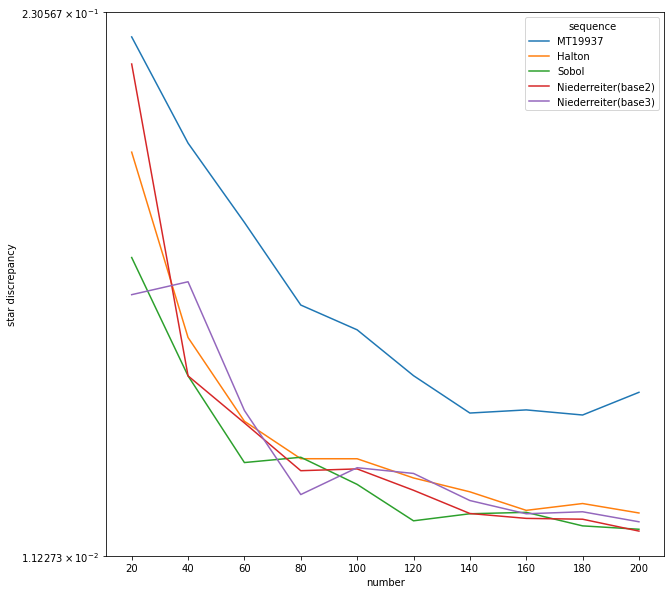

In [2]:
norm_2d_l = [0.220478,0.177592,0.145534,0.112201,0.102201,0.0835842,0.0686998,0.0698417,0.0679062,0.076901]
norm_2d_u = [0.220716,0.177916,0.145946,0.112613,0.102613,0.0842435,0.06896,0.0703523,0.0681664,0.0774836]
norm_2d_m = np.average(np.array([norm_2d_l,norm_2d_u]),axis=0)

halton_2d_l = [0.173843,0.0988426,0.0653549,0.05,0.0502392,0.0422711,0.0368616,0.0292631,0.0320023,0.02826]
halton_2d_u = [0.174351,0.0997694,0.065673,0.050796,0.050531,0.0430051,0.0372239,0.0298632,0.0326345,0.028751]
halton_2d_m = np.average(np.array([halton_2d_l,halton_2d_u]),axis=0)

sobol_2d_l=[0.13125,0.0835938,0.0484375,0.0505859,0.0398437,0.0251302,0.027941,0.0284485,0.0229953,0.0215149]
sobol_2d_u=[0.131915,0.0840564,0.0492664,0.0513848,0.040244,0.0255617,0.0284411,0.0290759,0.0236088,0.0223575]
sobol_2d_m=np.average(np.array([sobol_2d_l,sobol_2d_u]),axis=0)

niederreiter_2d_2_l=[0.209375,0.0835938,0.0644531,0.0451907,0.0460742,0.0372233,0.027822,0.0260742,0.0255918,0.0209969]
niederreiter_2d_2_u=[0.209954,0.0840564,0.065252,0.0459392,0.0465015,0.038109,0.0287652,0.0265808,0.0263902,0.0213977]
niederreiter_2d_2_m=np.average(np.array([niederreiter_2d_2_l,niederreiter_2d_2_u]),axis=0)

niederreiter_2d_3_l=[0.116255,0.121442,0.0695631,0.0357535,0.0466431,0.0441579,0.0332615,0.0280169,0.0287416,0.0247486]
niederreiter_2d_3_u=[0.116931,0.122164,0.0701622,0.0361236,0.0468892,0.0447588,0.0337961,0.0283526,0.0292454,0.0251581]
niederreiter_2d_3_m=np.average(np.array([niederreiter_2d_3_l,niederreiter_2d_3_u]),axis=0)

x = np.arange(20,220,20)
data_2d = pd.DataFrame({
    'number': np.tile(x,5),
    'sequence': ['MT19937']*10+['Halton']*10+['Sobol']*10+['Niederreiter(base2)']*10+['Niederreiter(base3)']*10,
    'star discrepancy': np.append(np.append(np.append(np.append(norm_2d_m,halton_2d_m),sobol_2d_m),niederreiter_2d_2_m),niederreiter_2d_3_m),
    'dimension': ['2D']*50
})

plt.figure(figsize=(10,10))
sns_plot = sns.lineplot(x='number',y='star discrepancy',hue='sequence',data=data_2d)
sns_plot.set_yscale('symlog')
sns_plot.set_xticks(x)

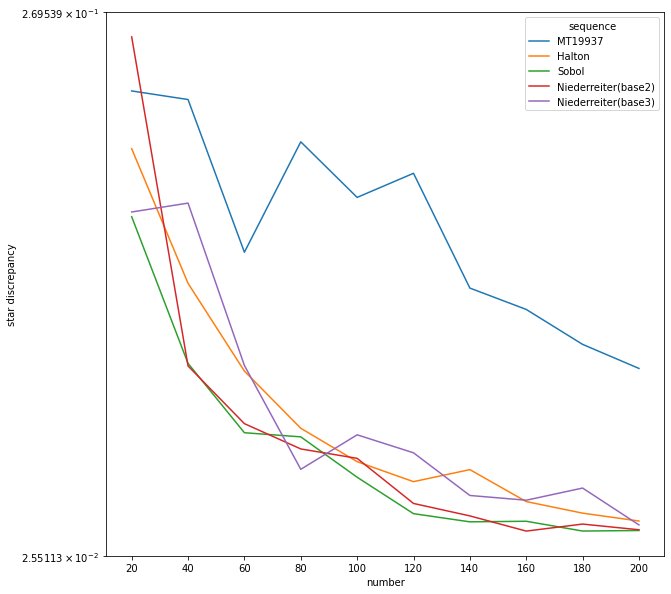

In [3]:
norm_3d_l = [0.233831,0.229981,0.161374,0.211107,0.186068,0.196867,0.145398,0.135788,0.120125,0.109395]
norm_3d_u = [0.234559,0.23069,0.162209,0.211589,0.186741,0.19757,0.146,0.136434,0.120728,0.109849]
norm_3d_m = np.average(np.array([norm_3d_l,norm_3d_u]),axis=0)

halton_3d_l = [0.20787,0.147481,0.108046,0.0825,0.0675,0.0584905,0.0639947,0.0495864,0.044429,0.0408333]
halton_3d_u = [0.208644,0.148149,0.108798,0.0830124,0.0680389,0.0590979,0.0644056,0.0501241,0.0448818,0.0414037]
halton_3d_m = np.average(np.array([halton_3d_l,halton_3d_u]),axis=0)

sobol_3d_l = [0.177417,0.111667,0.0805227,0.0786194,0.060575,0.0440732,0.0404645,0.0406897,0.0361581,0.0365189]
sobol_3d_u = [0.17805,0.112065,0.0809946,0.0791973,0.0609938,0.0447793,0.0410534,0.041348,0.0370894,0.037214]
sobol_3d_m = np.average(np.array([sobol_3d_l,sobol_3d_u]),axis=0)

niederreiter_3d_2_l = [0.258203,0.110364,0.0846781,0.0731812,0.0689217,0.0488424,0.0431422,0.0363159,0.0394795,0.03681]
niederreiter_3d_2_u = [0.258691,0.111097,0.0849967,0.0737839,0.0695926,0.0491874,0.0437039,0.0368911,0.0400258,0.0375931]
niederreiter_3d_2_m = np.average(np.array([niederreiter_3d_2_l,niederreiter_3d_2_u]),axis=0)

niederreiter_3d_3_l = [0.179492,0.183609,0.110682,0.0640263,0.0794885,0.071369,0.0521653,0.0500738,0.0556956,0.0391532]
niederreiter_3d_3_u = [0.18022,0.184066,0.111209,0.0646516,0.0801546,0.0721232,0.0530213,0.0508522,0.0561501,0.0396149]
niederreiter_3d_3_m = np.average(np.array([niederreiter_3d_3_l,niederreiter_3d_3_u]),axis=0)

x = np.arange(20,220,20)
data_3d = pd.DataFrame({
    'number': np.tile(x,5),
    'sequence': ['MT19937']*10+['Halton']*10+['Sobol']*10+['Niederreiter(base2)']*10+['Niederreiter(base3)']*10,
    'star discrepancy': np.append(np.append(np.append(np.append(norm_3d_m,halton_3d_m),sobol_3d_m),niederreiter_3d_2_m),niederreiter_3d_3_m),
    'dimension': ['3D']*50
})

plt.figure(figsize=(10,10))
sns_plot = sns.lineplot(x='number',y='star discrepancy',hue='sequence',data=data_3d)
sns_plot.set_yscale('symlog')
sns_plot.set_xticks(x)

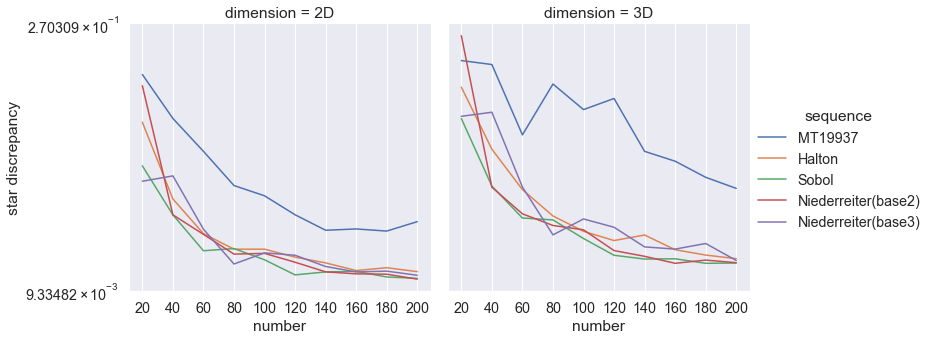

In [11]:
data = pd.concat([data_2d, data_3d])
sns.set(font_scale = 1.3)
g = sns.FacetGrid(data, hue="sequence", col="dimension", height=5)
g.map(sns.lineplot, "number", "star discrepancy")
g.set(yscale='symlog',xticks=x)
g.add_legend()
# plt.savefig('star_discrepancy.png')
g.fig.savefig('star_discrepancy.png',bbox_inches='tight')